# Sharpening

### Purpose : Highligh transitions in intensities

## 1. Using the Second Derivative for Image Sharpening—The Laplacian 

### `dst= cv.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]	)`


* src1-first input array.
* alpha-weight of the first array elements.
* src2-second input array of the same size and channel number as src1.
* beta-weight of the second array elements.
* gamma-scalar added to each sum.

[source](https://docs.opencv.org/master/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19)

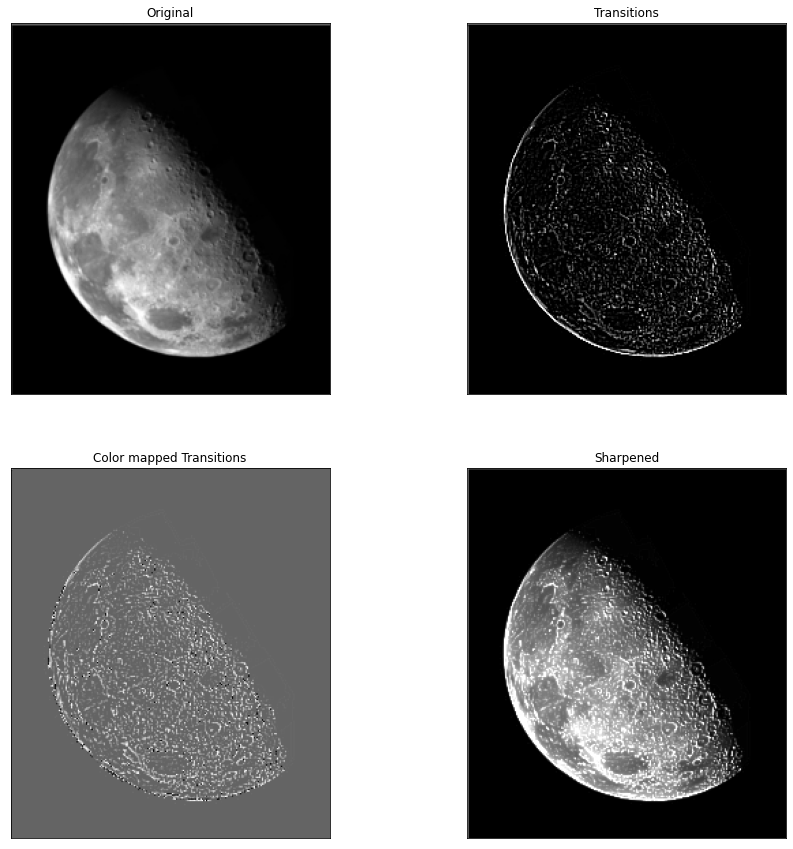

In [3]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('moon.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Using center positive laplacian mask

kernel = np.array([(-1,-1,-1),(-1,8,-1),(-1,-1,-1)]) # Able to capture diagonal transitions too -more filtering effect
#kernel = np.array([(0,-1,0),(-1,4,-1),(0,-1,0)]) # Able to capture non-diagonal transitions only
transitions = cv.filter2D(img, -1, kernel)

#sharpened = img + transitions # if center is positive in kernel transitions must be added

sharpened = cv.addWeighted( img, 1.0, transitions, 1, 0) #Opencv addition is used because numpy addition saturates.

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(15,15))
axes[0,0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(transitions, cmap='gray', vmin = 0, vmax = 255)
axes[0,1].set_title('Transitions')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(transitions+100, cmap='gray', vmin = 0, vmax = 255)
axes[1,0].set_title('Color mapped Transitions')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(sharpened, cmap='gray', vmin = 0, vmax = 255)
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

## 2. Unsharp Masking and Highboost Filtering

1. Blur the original image.
2. Subtract the blurred image from the original (the resulting difference is called the mask.)
3. Add the mask to the original.

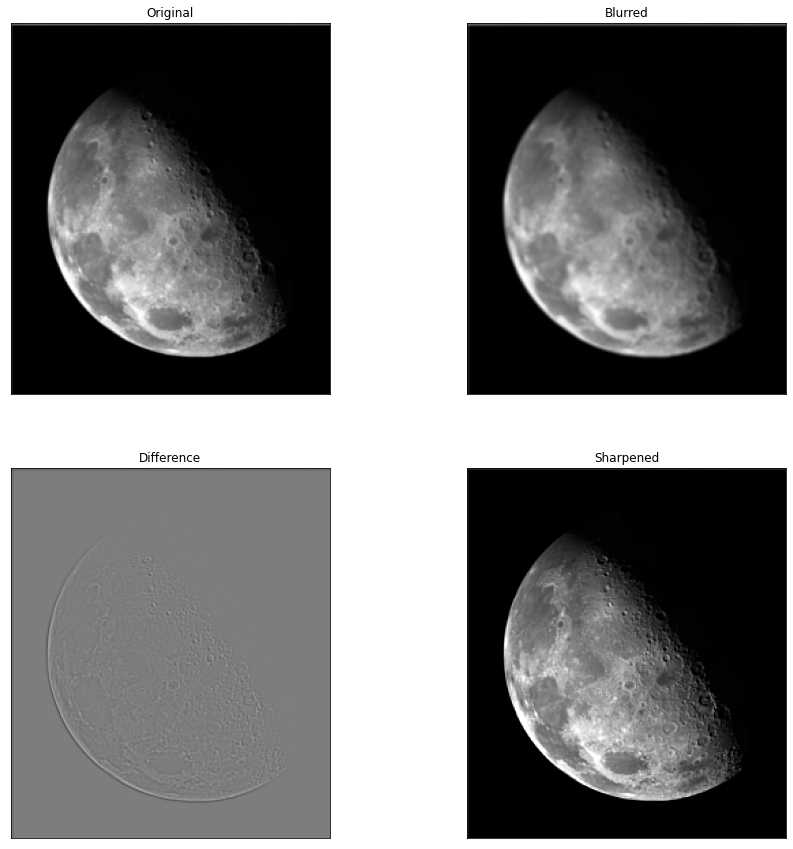

In [1]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('moon.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(3, sigma)

blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)

mask = img.astype('float32') - blurred.astype('float32')

k = 1 # when k =1 : unsharp masking, when k>1 : Highboost Filtering
sharpened = cv.addWeighted(img.astype('float32') , 1., mask, k, 0)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(15,15))
axes[0,0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(blurred, cmap='gray', vmin = 0, vmax = 255)
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(mask + 125, cmap='gray', vmin = 0, vmax = 255)
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(sharpened, cmap='gray', vmin = 0, vmax = 255)
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

## 3. Another kernel

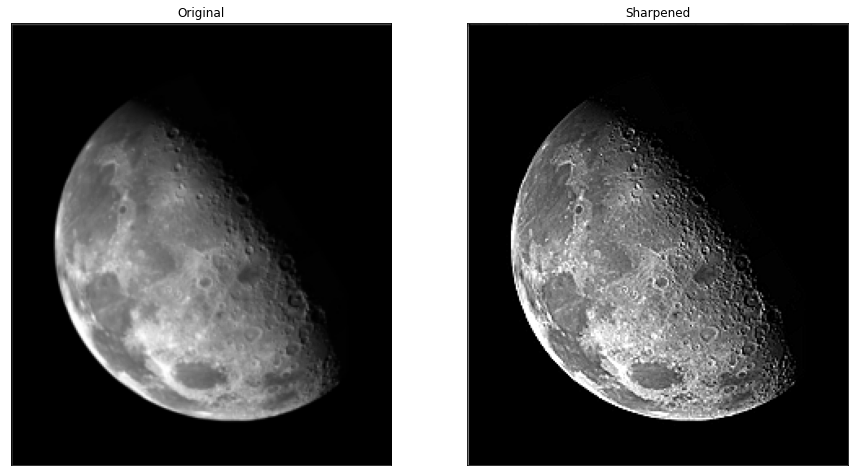

In [52]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('moon.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
img_sharp = cv.filter2D(img,-1,kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(15,15))
axes[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_sharp, cmap='gray', vmin = 0, vmax = 255)
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()